In [2]:
import pandas as pd
from usp_stream_datasets import *

pd.set_option('mode.use_inf_as_na', True)

dataset = "Abrupt (bal.)"
change_points = insects_datasets[dataset]["change_point"]
df = load_insect_dataset(insects_datasets[dataset]["filename"])

first_abrupt_change_point = change_points[0]

df_train = df.iloc[:first_abrupt_change_point].copy()
df_test = df.iloc[first_abrupt_change_point:].copy()
# del df

from sklearn.preprocessing import LabelEncoder

y = df_train.pop("class")
le = LabelEncoder()
y_hat = le.fit_transform(y)

df_train["target"] = y_hat

In [22]:
# from pycaret.classification import *
# clf1 = setup(df, target = 'target', session_id=123, log_experiment=True, experiment_name='first_pycaret')

In [18]:
from pycaret.classification import ClassificationExperiment

s = ClassificationExperiment()
s.setup(df_train, target = 'target', session_id = 1, fix_imbalance = True)

,Description,Value
0,Session id,1
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(14352, 34)"
4,Transformed data shape,"(22210, 34)"
5,Transformed train set shape,"(17904, 34)"
6,Transformed test set shape,"(4306, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


In [19]:
s.dataset_transformed.target.value_counts()

5    4263
4    3999
1    3883
0    3572
2    3420
3    3073
Name: target, dtype: int64

In [21]:
s.automl()

ValueError: Estimator None does not have the required fit() method.

In [3]:
# OOP API
best = s.compare_models(errors="raise" )
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6689,0.9077,0.6689,0.6526,0.6494,0.5693,0.5736,0.1140
lightgbm,Light Gradient Boosting Machine,0.6679,0.9088,0.6679,0.6517,0.6511,0.5690,0.5723,666.6790
et,Extra Trees Classifier,0.6628,0.9041,0.6628,0.6447,0.6427,0.5611,0.5655,0.1570
gbc,Gradient Boosting Classifier,0.6624,0.9071,0.6624,0.6419,0.6426,0.5612,0.5654,0.1440
lr,Logistic Regression,0.6361,0.8887,0.6361,0.6054,0.5974,0.5220,0.5329,0.2580
ridge,Ridge Classifier,0.6228,0.0000,0.6228,0.5868,0.5748,0.5021,0.5172,0.0280
lda,Linear Discriminant Analysis,0.6210,0.8829,0.6210,0.6005,0.6033,0.5111,0.5145,0.0370
svm,SVM - Linear Kernel,0.6137,0.0000,0.6137,0.5827,0.5507,0.4883,0.5093,0.0260
qda,Quadratic Discriminant Analysis,0.6064,0.8894,0.6064,0.6090,0.5622,0.4953,0.5109,0.0310
knn,K Neighbors Classifier,0.6033,0.8485,0.6033,0.5872,0.5916,0.4877,0.4889,0.0580


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


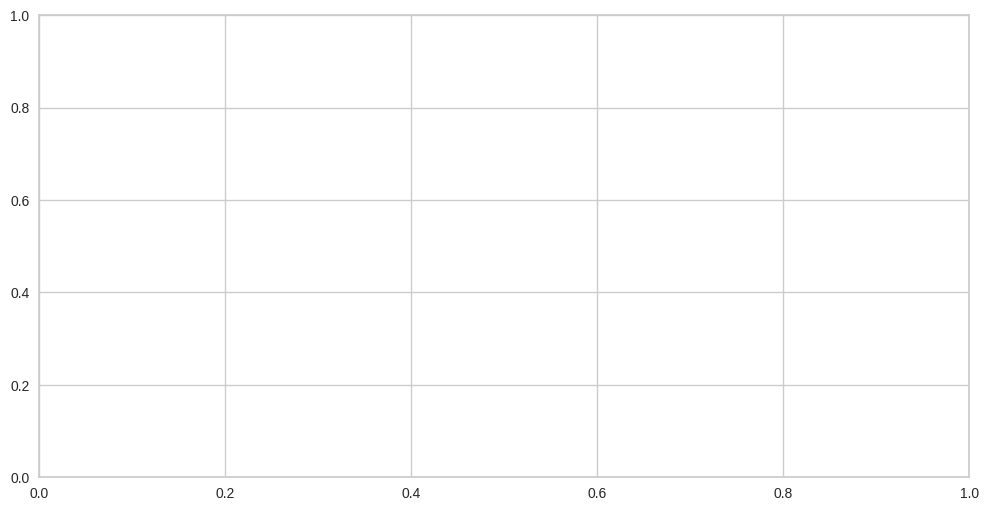

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# OOP API
s.evaluate_model(best)

In [5]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [10]:
s.save_model(best, "RandomForestClassifier")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Att1', 'Att2', 'Att3', 'Att4',
                                              'Att5', 'Att6', 'Att7', 'Att8',
                                              'Att9', 'Att10', 'Att11', 'Att12',
                                              'Att13', 'Att14', 'Att15', 'Att16',
                                              'Att17', 'Att18', 'Att19', 'Att20',
                                              'Att21', 'Att22', 'Att23', 'Att24',
                                              'Att25', 'Att26', 'Att27', 'Att28',
                                              'Att29', 'Att30', ....
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt

In [13]:
# save experiment
from pycaret.classification import save_experiment
s.save_experiment('pycaret_experiment')

In [14]:
y = df_train.pop("class")
X = df_train

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_hat = le.fit_transform(y)

# y_hat
# le.inverse_transform(y_hat)

## TODO: Data preparation

Given the nature of SVC, maybe is a good thing to properly scale some attributes.

In [22]:
# numeric_features = ["age", "fare"]

# numeric_transformer = Pipeline(
#     steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
# )

# categorical_features = ["embarked", "sex", "pclass"]

# categorical_transformer = Pipeline(
#     steps=[
#         ("encoder", OneHotEncoder(handle_unknown="ignore")),
#         ("selector", SelectPercentile(chi2, percentile=50)),
#     ]
# )

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_features),
#         ("cat", categorical_transformer, categorical_features),
#     ]
# )

# clf = Pipeline(
#     steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
# )

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# clf.fit(X_train, y_train)
# print("model score: %.3f" % clf.score(X_test, y_test))


In [28]:
from sklearn import svm

# Fit the model(took about 2 mins)
clf = svm.SVC(kernel="linear", C=1000) # this C parameter can actually be very wrong, but ok for now
clf.fit(X, y_hat)

SVC(C=1000, kernel='linear')

In [40]:
y_test = df_test.pop("class")
X_test = df_test

y_test_hat = le.transform(y_test)

### Check the performance on the rest of the dataframe

The low value here can be because of the absence of any kind of data prep or because of the concept drift inherent to the dataset.

In [43]:
clf.score(X_test, y_test_hat)

0.46325075418228356

### Check the performance on the training dataset just for curiosity

It's a little bit low. 

In [44]:
clf.score(X, y_hat)

0.6568422519509476

## Check for some better performance when using a grid searched classifier

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 10, 100, 1000]}

svc = svm.SVC()
grid_clf = GridSearchCV(svc, parameters) # took 30mins
grid_clf.fit(X, y_hat)

sorted(grid_clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [52]:
grid_clf.score(X_test, y_test_hat)

0.47313892190023465

## TODO: check the feature importance

## TODO: Plot decision boundaries for pairs of attribures

In [39]:
# import matplotlib.pyplot as plt
# from sklearn.inspection import DecisionBoundaryDisplay

# plt.scatter(X["Att1"], X["Att2"], c=y_hat, s=30, cmap=plt.cm.Paired)

# # plot the decision function
# ax = plt.gca()

# DecisionBoundaryDisplay.from_estimator(
#     clf,
#     X,
#     plot_method="contour",
#     colors="k",
#     levels=[-1, 0, 1],
#     alpha=0.5,
#     linestyles=["--", "-", "--"],
#     ax=ax,
# )

# # plot support vectors
# ax.scatter(
#     clf.support_vectors_[:, "Att1"],
#     clf.support_vectors_[:, "Att2"],
#     s=100,
#     linewidth=1,
#     facecolors="none",
#     edgecolors="k",
# )

# plt.show()